In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv', usecols=['date', 'country', 'store', 'product', 'num_sold'])

In [3]:
df.shape

(26298, 5)

In [4]:
df.head()

,date,country,store,product,num_sold
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [5]:
df.describe()

,num_sold
count,26298.000000
mean,387.533577
std,266.076193
min,70.000000
25%,190.000000
50%,315.000000
75%,510.000000
max,2884.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      26298 non-null  object
 1   country   26298 non-null  object
 2   store     26298 non-null  object
 3   product   26298 non-null  object
 4   num_sold  26298 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [7]:
df.isnull().values.any()

False

In [8]:
df.country.value_counts()

Finland    8766
Norway     8766
Sweden     8766
Name: country, dtype: int64

In [9]:
df.store.value_counts()

KaggleMart    13149
KaggleRama    13149
Name: store, dtype: int64

# EDA

In [10]:
df.groupby('product').count()

,date,country,store,num_sold
product,,,,
Kaggle Hat,8766,8766,8766,8766
Kaggle Mug,8766,8766,8766,8766
Kaggle Sticker,8766,8766,8766,8766


In [11]:
df.date = pd.to_datetime(df.date)

# F.E.

I will remove the dates and on it's place add the respective days and months

In [12]:
df['month'] = df['date'].dt.month

In [13]:
df['day'] = df['date'].dt.day

In [14]:
df.head()

,date,country,store,product,num_sold,month,day
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,1,1
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,1,1
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,1,1
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,1,1
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,1,1


In [15]:
df.drop(axis=1, columns=['date'])

,country,store,product,num_sold,month,day
0,Finland,KaggleMart,Kaggle Mug,329,1,1
1,Finland,KaggleMart,Kaggle Hat,520,1,1
2,Finland,KaggleMart,Kaggle Sticker,146,1,1
3,Finland,KaggleRama,Kaggle Mug,572,1,1
4,Finland,KaggleRama,Kaggle Hat,911,1,1
...,...,...,...,...,...,...
26293,Sweden,KaggleMart,Kaggle Hat,823,12,31
26294,Sweden,KaggleMart,Kaggle Sticker,250,12,31
26295,Sweden,KaggleRama,Kaggle Mug,1004,12,31
26296,Sweden,KaggleRama,Kaggle Hat,1441,12,31


In [16]:
df = pd.get_dummies(columns=['country', 'store', 'product'], data=df)

In [17]:
df.head()

,date,num_sold,month,day,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker
0,2015-01-01,329,1,1,1,0,0,1,0,0,1,0
1,2015-01-01,520,1,1,1,0,0,1,0,1,0,0
2,2015-01-01,146,1,1,1,0,0,1,0,0,0,1
3,2015-01-01,572,1,1,1,0,0,0,1,0,1,0
4,2015-01-01,911,1,1,1,0,0,0,1,1,0,0


In [18]:
import scipy.stats as stats

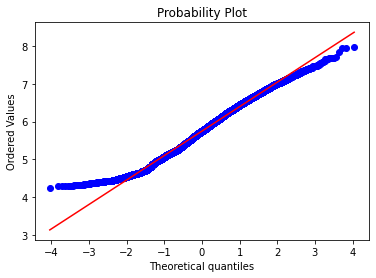

In [19]:
stats.probplot(np.log(df.num_sold), plot=plt)
plt.show()

In [20]:
df['new_sold'] = np.log(df.num_sold)
df.head()

,date,num_sold,month,day,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker,new_sold
0,2015-01-01,329,1,1,1,0,0,1,0,0,1,0,5.796058
1,2015-01-01,520,1,1,1,0,0,1,0,1,0,0,6.253829
2,2015-01-01,146,1,1,1,0,0,1,0,0,0,1,4.983607
3,2015-01-01,572,1,1,1,0,0,0,1,0,1,0,6.349139
4,2015-01-01,911,1,1,1,0,0,0,1,1,0,0,6.814543


In [21]:
df.drop(axis=1 , inplace=True, columns=['num_sold','date'])

In [22]:
df.head()

,month,day,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker,new_sold
0,1,1,1,0,0,1,0,0,1,0,5.796058
1,1,1,1,0,0,1,0,1,0,0,6.253829
2,1,1,1,0,0,1,0,0,0,1,4.983607
3,1,1,1,0,0,0,1,0,1,0,6.349139
4,1,1,1,0,0,0,1,1,0,0,6.814543


# Data Splitting

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(data=df_scaled, columns=df.columns[:])
df_scaled

,month,day,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker,new_sold
0,-1.601451,-1.673805,1.414214,-0.707107,-0.707107,1.0,-1.0,-0.707107,1.414214,-0.707107,0.070101
1,-1.601451,-1.673805,1.414214,-0.707107,-0.707107,1.0,-1.0,1.414214,-0.707107,-0.707107,0.775052
2,-1.601451,-1.673805,1.414214,-0.707107,-0.707107,1.0,-1.0,-0.707107,-0.707107,1.414214,-1.181044
3,-1.601451,-1.673805,1.414214,-0.707107,-0.707107,-1.0,1.0,-0.707107,1.414214,-0.707107,0.921826
4,-1.601451,-1.673805,1.414214,-0.707107,-0.707107,-1.0,1.0,1.414214,-0.707107,-0.707107,1.638532
...,...,...,...,...,...,...,...,...,...,...,...
26293,1.588154,1.735250,-0.707107,-0.707107,1.414214,1.0,-1.0,1.414214,-0.707107,-0.707107,1.482092
26294,1.588154,1.735250,-0.707107,-0.707107,1.414214,1.0,-1.0,-0.707107,-0.707107,1.414214,-0.352768
26295,1.588154,1.735250,-0.707107,-0.707107,1.414214,-1.0,1.0,-0.707107,1.414214,-0.707107,1.788223
26296,1.588154,1.735250,-0.707107,-0.707107,1.414214,-1.0,1.0,1.414214,-0.707107,-0.707107,2.344682


In [33]:
X = df_scaled.drop(axis=1, columns=['new_sold'])
y = df_scaled.new_sold

In [36]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix

In [37]:
kfold = KFold(n_splits=10, shuffle=True)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [39]:
lr = LinearRegression()
rfr = RandomForestRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
xgr = XGBRegressor()

In [40]:
score = []
models = ['lr', 'rfr', 'dtr', 'svr', 'xgr']
for model in models:
    s = cross_val_score(estimator=lr, X=x_train, y=y_train, cv=kfold, n_jobs=-1, verbose=3)
    score.append(np.mean(s))
score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    1.6s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent worker

[0.900053790884835,
 0.9002165752816284,
 0.90015115504329,
 0.9001967848369757,
 0.9001346430437396]

I am going to perform hyperparamter tuning on RFR and XGBR

### RFR

In [41]:
rfr= RandomForestRegressor(n_estimators=200, criterion='squared_error', random_state=10)

In [42]:
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=10)

In [43]:
y_pred = rfr.predict(x_test)

In [44]:
y_pred

array([ 0.99270862, -1.75087915,  2.07094943, ...,  1.64448037,
        0.98259474,  0.60767389])

In [45]:
r2_score(y_test, y_pred)

0.9299735036289142

### XGR

In [46]:
xgr = XGBRegressor()

In [47]:
learning_rate = [0.05,0.1,0.2,0.3,0.35,0.4,0.45,0.5,0.55]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6]

In [48]:
random = RandomizedSearchCV(estimator=xgr, param_distributions={'learning_rate':learning_rate,
                                                                'gamma':gamma},
                            n_iter=10, cv=3, verbose=1, n_jobs=-1)

In [49]:
random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predicto

In [50]:
random.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [51]:
random.best_score_

0.9534494924247846

In [52]:
xgr = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=np.nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [53]:
xgr.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [54]:
y_pred_xgr = xgr.predict(x_test)

In [55]:
y_pred_xgr

array([ 1.0140421 , -1.8020418 ,  2.1297462 , ...,  1.7107556 ,
        0.97900826,  0.39149204], dtype=float32)

In [56]:
r2_score(y_test, y_pred_xgr)

0.9549149439452785

## I AM GOING TO USE XGBR FOR MY TEST DATA (For Kaggle)

In [57]:
df_test = pd.read_csv('test.csv', usecols=['country', 'store', 'product', 'row_id'])

In [58]:
df_test.head()

,row_id,country,store,product
0,26298,Finland,KaggleMart,Kaggle Mug
1,26299,Finland,KaggleMart,Kaggle Hat
2,26300,Finland,KaggleMart,Kaggle Sticker
3,26301,Finland,KaggleRama,Kaggle Mug
4,26302,Finland,KaggleRama,Kaggle Hat


In [59]:
df_test.isnull().values.any()

False

In [60]:
X = df_test.drop(axis=1, columns=['row_id'])

In [61]:
X = pd.get_dummies(data=X)

In [62]:
X.head()

,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker
0,1,0,0,1,0,0,1,0
1,1,0,0,1,0,1,0,0
2,1,0,0,1,0,0,0,1
3,1,0,0,0,1,0,1,0
4,1,0,0,0,1,1,0,0


In [71]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scale = scale.fit_transform(X)
X_scale = pd.DataFrame(data=X_scale, columns=X.columns[:])
X_scale

,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker
0,1.414214,-0.707107,-0.707107,1.0,-1.0,-0.707107,1.414214,-0.707107
1,1.414214,-0.707107,-0.707107,1.0,-1.0,1.414214,-0.707107,-0.707107
2,1.414214,-0.707107,-0.707107,1.0,-1.0,-0.707107,-0.707107,1.414214
3,1.414214,-0.707107,-0.707107,-1.0,1.0,-0.707107,1.414214,-0.707107
4,1.414214,-0.707107,-0.707107,-1.0,1.0,1.414214,-0.707107,-0.707107
...,...,...,...,...,...,...,...,...
6565,-0.707107,-0.707107,1.414214,1.0,-1.0,1.414214,-0.707107,-0.707107
6566,-0.707107,-0.707107,1.414214,1.0,-1.0,-0.707107,-0.707107,1.414214
6567,-0.707107,-0.707107,1.414214,-1.0,1.0,-0.707107,1.414214,-0.707107
6568,-0.707107,-0.707107,1.414214,-1.0,1.0,1.414214,-0.707107,-0.707107


In [81]:
month = df_scaled['month'].sample(6570, random_state=10)
day = df_scaled['day'].sample(6570, random_state=10)

In [82]:
X_scale.loc[0:6570, 'month'] = month.values
X_scale.loc[0:6570, 'day'] = day.values
X_scale 

,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker,month,day
0,1.414214,-0.707107,-0.707107,1.0,-1.0,-0.707107,1.414214,-0.707107,-1.311487,-0.310183
1,1.414214,-0.707107,-0.707107,1.0,-1.0,1.414214,-0.707107,-0.707107,0.138333,-1.446535
2,1.414214,-0.707107,-0.707107,1.0,-1.0,-0.707107,-0.707107,1.414214,-0.731559,-0.310183
3,1.414214,-0.707107,-0.707107,-1.0,1.0,-0.707107,1.414214,-0.707107,-0.441595,-1.332899
4,1.414214,-0.707107,-0.707107,-1.0,1.0,1.414214,-0.707107,-0.707107,-1.601451,1.507980
...,...,...,...,...,...,...,...,...,...,...
6565,-0.707107,-0.707107,1.414214,1.0,-1.0,1.414214,-0.707107,-0.707107,0.138333,-0.082912
6566,-0.707107,-0.707107,1.414214,1.0,-1.0,-0.707107,-0.707107,1.414214,-1.311487,0.371628
6567,-0.707107,-0.707107,1.414214,-1.0,1.0,-0.707107,1.414214,-0.707107,-0.441595,-0.423818
6568,-0.707107,-0.707107,1.414214,-1.0,1.0,1.414214,-0.707107,-0.707107,1.298190,1.394345


In [83]:
prediction = xgr.predict(X_scale)
prediction

array([ 0.99140316,  0.14404711,  1.5217154 , ...,  0.174821  ,
       -1.6371231 ,  1.4337164 ], dtype=float32)

In [84]:
prediction = pd.Series(prediction)
prediction

0       0.991403
1       0.144047
2       1.521715
3       0.564085
4      -1.438283
          ...   
6565   -0.003073
6566    0.045333
6567    0.174821
6568   -1.637123
6569    1.433716
Length: 6570, dtype: float32

In [85]:
submit = pd.concat([df_test.row_id, prediction], axis=1)

In [86]:
submit.columns = ['row_id', 'num_sold']

In [87]:
submit

,row_id,num_sold
0,26298,0.991403
1,26299,0.144047
2,26300,1.521715
3,26301,0.564085
4,26302,-1.438283
...,...,...
6565,32863,-0.003073
6566,32864,0.045333
6567,32865,0.174821
6568,32866,-1.637123


In [88]:
submit.to_csv('submit.csv', index=False)

In [89]:
submit.num_sold.mean()

0.104088575

In [90]:
submit.num_sold.std()

0.9665569